## Clustering Experimentation
- Student Name: Dragon Xu

Template Version V2. (adopted from Prof. Tom Bihari's)


In [ ]:
%pip install pandas
%pip install numpy
%pip install -U "scikit-learn==0.23.1"
%pip install graphviz
%pip install pydotplus
%pip install six
%pip install kneed

import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
#from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix)
import itertools
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO

%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn import utils
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

     |████████████████████████████████| 6.8 MB 2.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [ ]:
# Import the dataset nonRef_data.csv and Ref_Data.csv
url_1 = "https://raw.githubusercontent.com/CristoDragon/CSE5243/main/NonRef_data.csv"
nonRefData = pd.read_csv(url_1, encoding= 'unicode_escape')

url_2 = "https://raw.githubusercontent.com/CristoDragon/CSE5243/main/Ref_Data.csv"
refData = pd.read_csv(url_2, encoding= 'unicode_escape')
print(refData)
print(refData.y.unique())
print(nonRefData)


      Unnamed: 0         X0        X1  y
0              0 -10.034530 -3.840980  1
1              1  -5.190377 -3.198882  3
2              2  -5.473488 -2.692955  3
3              3  -4.959855 -3.107043  3
4              4  -6.688130  8.556784  6
...          ...        ...       ... ..
1995        1995  -1.306391  1.180059  4
1996        1996  -6.506079 -9.658119  2
1997        1997  -8.333741 -6.394469  2
1998        1998  -4.121770  7.374333  6
1999        1999  -3.696761  2.463901  0

[2000 rows x 4 columns]
[1 3 6 0 5 4 7 2]
      Unnamed: 0        X0        X1
0              0 -0.787816  0.806339
1              1  1.480423 -0.139902
2              2  0.274929 -0.117472
3              3  0.520773 -0.367300
4              4  0.213426 -0.049130
...          ...       ...       ...
1995        1995  1.792374 -0.195105
1996        1996  0.290452  0.336957
1997        1997  2.387512  0.084661
1998        1998  1.004315  0.735097
1999        1999  0.111782  0.311004

[2000 rows x 3 colum

***
# Section: 1 - Reference Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS, the between-cluster BSS, and the overall SSE.
***

In [ ]:
# Reference source: https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
# Reference source: https://medium.com/@ODSC/unsupervised-learning-evaluating-clusters-bd47eed175ce

# Find the Euclidean distance between a given point and its centroid.
# Iterate over all points, and sum the values then divide by the number of points.
centroids = []
for i in range(0, 8):
  sum0 = 0
  sum1 = 0
  count = 0
  for j in range(0, 2000):
    if refData.iloc[j]['y']==i:
      sum0 = sum0 + refData.iloc[j]['X0']
      sum1 = sum1 + refData.iloc[j]['X1']
      count = count + 1
  centroids.append(sum0 / count)
  centroids.append(sum1 / count)
# Check out the result of the coordinates of centroids for 8 clusters
print(centroids)
# Verify that we do have 16 values from 8 centroids
print(len(centroids))

eu_sum = 0
eu_distance = 0
wss = 0
for i in range(0, 8):
  # Put the coordinates of the ith centroid to a numpy array
  centroid = np.array((centroids[2*i], centroids[2*i+1]))
  eu_distance = 0
  for j in range(0, 2000):
    if refData.iloc[j]['y']==i:
      # Put the coordinates of a point that belongs to the ith centroid to a numpy array
      point = np.array((refData.iloc[j]['X0'], refData.iloc[j]['X1']))
      # Sum up all the Euclidean distance we have computed for a cluster
      eu_distance = eu_distance + np.linalg.norm(point - centroid)
      eu_sum = eu_sum + np.linalg.norm(point - centroid)
  # Print the true within-cluster WSS
  print("{}{}: {}".format("WSS", i, eu_distance))
# Print the overall SSE
print("{}: {}".format("Overall SSE", eu_sum))


# Find the Euclidean distance from a given cluster centroid to all other cluster centroids.
# Iterate this process for all clusters, and sum all values together.
BSS = 0
for i in range(0, 6):
  centroid = np.array((centroids[2*i], centroids[2*i+1]))
  for j in range(i+1, 7):
    other_centroid = np.array((centroids[2*j], centroids[2*j+1]))
    BSS = BSS + np.linalg.norm(centroid - other_centroid)
# Print the value of true between-cluster WSS
print("{}: {}".format("BSS", BSS))

[-1.631572301107389, 4.475892524793273, -9.954110152327573, -3.9470615540911007, -6.98032019504256, -8.062428645287106, -6.296407604283294, -3.13033435932023, -2.0796347245549955, 0.7693366264373558, -1.6396676823597018, 3.6886424071079955, -5.936151744602411, 7.6129325542291735, -9.419849570840194, 3.368172331250904]
16
WSS0: 304.252130074476
WSS1: 305.4321962206943
WSS2: 316.13536712098653
WSS3: 327.7890630659497
WSS4: 315.36287124698356
WSS5: 298.2891776584156
WSS6: 323.31097338856165
WSS7: 307.0243534076917
Overall SSE: 2497.5961321837576
BSS: 170.84790992021098


***
## Section: 1.2 - Configure and Run the K-Means
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the within-cluster WSS, the between-cluster BSS, and the overall SSE, and compute the running time.
***

Run the K-means algorithm for K = 6

In [ ]:
# Reference source: https://realpython.com/k-means-clustering-python/#partitional-clustering
# First we do some data processing, rescaling the data so that X0 and X1 have the same weight

# Set up the startibg time for this K-means algorithm
start = time.time()

scaler = StandardScaler()
print(refData)
refData_no_labels = refData.drop(refData.columns[[0,3]], axis = 1)
scaled_RefData = scaler.fit_transform(refData_no_labels)
print(scaled_RefData)  # We can see the values are different from original data, so now we can do K-means clustering

# Initiate the K-means class with some arguments
kmeans = KMeans(init="random", n_clusters=6, n_init=10, max_iter=300, random_state=42)  # For "init" param, we choose "random" because
# we want to do the standard way first. For the "n_clusters", we choose 6 because hw4 requires us to run K-means algorithm
# for K = 6, 8, 10. For "mn_init", we choose 10 because we want to have many initializations so we can choose the one
# with the lowest SSE. For "max_iter" we choose 300 because we want to give each initialization more space for multiple runs.

# Perform K-means algorithm on our scaled data and it will take 10 runs
kmeans.fit(scaled_RefData)
# Find the one wtih the lowest SSE available
print("{}: {}".format("Lowest SSE", kmeans.inertia_))
# Find locations of the centroids
print("{}: {}".format("Locations of the centroids", kmeans.cluster_centers_))
# Find the number of required iterations
print("{}: {}".format("Required iterations", kmeans.n_iter_))
# See what are the predicted class labels(only the first ten)
print("{}: {}".format("Predicted class labels(only show the first 50 point)",kmeans.labels_[:50]))

# Set up the ending time
end = time.time()
# Print the total computing time
print(f"Running time of K-means algorithm is {end - start}")


      Unnamed: 0         X0        X1  y
0              0 -10.034530 -3.840980  1
1              1  -5.190377 -3.198882  3
2              2  -5.473488 -2.692955  3
3              3  -4.959855 -3.107043  3
4              4  -6.688130  8.556784  6
...          ...        ...       ... ..
1995        1995  -1.306391  1.180059  4
1996        1996  -6.506079 -9.658119  2
1997        1997  -8.333741 -6.394469  2
1998        1998  -4.121770  7.374333  6
1999        1999  -3.696761  2.463901  0

[2000 rows x 4 columns]
[[-1.37103866 -0.88996276]
 [ 0.09110556 -0.76119773]
 [ 0.00565222 -0.65973999]
 ...
 [-0.85767773 -1.40203448]
 [ 0.4136508   1.35913473]
 [ 0.54193404  0.37440595]]
Lowest SSE: 334.7094153000583
Locations of the centroids: [[ 1.12232151  0.47903384]
 [-0.13523728  1.40294406]
 [-0.21200757 -0.75040875]
 [-1.33004106 -0.91530061]
 [-1.19328965  0.55356784]
 [-0.44330426 -1.74734079]]
Required iterations: 22
Predicted class labels(only show the first 50 point): [3 2 2 2 1 0 2 2

In [ ]:

# Compute WSS, BSS, and SSE
print(kmeans.cluster_centers_)
print(type(kmeans.labels_))
print(kmeans.cluster_centers_[1])
eu_sum = 0
eu_distance = 0
for i in range(0, 6):
  # Put the coordinates of the ith centroid to a numpy array
  centroid = kmeans.cluster_centers_[i]
  eu_distance = 0
  for j in range(0, 2000):
    if kmeans.labels_[j]==i:
      # Put the coordinates of a point that belongs to the ith centroid to a numpy array
      point = np.array((refData.iloc[j]['X0'], refData.iloc[j]['X1']))
      # Sum up all the Euclidean distance we have computed for a cluster
      eu_distance = eu_distance + np.linalg.norm(point - centroid)
      eu_sum = eu_sum + np.linalg.norm(point - centroid)
  # Print the true within-cluster WSS
  print("{}{}: {}".format("WSS", i, eu_distance))
# Print the overall SSE
print("{}: {}".format("Overall SSE", eu_sum))


# Find the Euclidean distance from a given cluster centroid to all other cluster centroids.
# Iterate this process for all clusters, and sum all values together.
BSS = 0
for i in range(0, 6):
  centroid = kmeans.cluster_centers_[i]
  for j in range(i+1, 6):
    other_centroid = kmeans.cluster_centers_[j]
    BSS = BSS + np.linalg.norm(centroid - other_centroid)
# Print the value of true between-cluster WSS
print("{}: {}".format("BSS", BSS))

[[ 1.12232151  0.47903384]
 [-0.13523728  1.40294406]
 [-0.21200757 -0.75040875]
 [-1.33004106 -0.91530061]
 [-1.19328965  0.55356784]
 [-0.44330426 -1.74734079]]
<class 'numpy.ndarray'>
[-0.13523728  1.40294406]
WSS0: 3151.7458393104885
WSS1: 2145.957658511416
WSS2: 1612.8350023557769
WSS3: 2388.981399226886
WSS4: 2192.9201825033165
WSS5: 2228.258530569428
Overall SSE: 13720.698612477288
BSS: 29.41604929880673


Run the K-means algorithm for K = 8


In [ ]:
# Set up the startibg time for this K-means algorithm
start = time.time()

# Initiate the K-means class with some arguments
kmeans = KMeans(init="random", n_clusters=8, n_init=10, max_iter=300, random_state=42)  # For "init" param, we choose "random" because
# we want to do the standard way first. For the "n_clusters", we choose 6 because hw4 requires us to run K-means algorithm
# for K = 6, 8, 10. For "mn_init", we choose 10 because we want to have many initializations so we can choose the one
# with the lowest SSE. For "max_iter" we choose 300 because we want to give each initialization more space for multiple runs.

# Perform K-means algorithm on our scaled data and it will take 10 runs
kmeans.fit(scaled_RefData)
# Find the one wtih the lowest SSE available
print("{}: {}".format("Lowest SSE", kmeans.inertia_))
# Find locations of the centroids
print("{}: {}".format("Locations of the centroids", kmeans.cluster_centers_))
# Find the number of required iterations
print("{}: {}".format("Required iterations", kmeans.n_iter_))
# See what are the predicted class labels(only the first ten)
print("{}: {}".format("Predicted class labels(only show the first 50 point)",kmeans.labels_[:50]))

# Set up the ending time
end = time.time()
# Print the total computing time
print(f"Running time of K-means algorithm is {end - start}")

Lowest SSE: 227.81238519832513
Locations of the centroids: [[-0.44330426 -1.74734079]
 [-1.19328965  0.55356784]
 [ 1.40775084  0.66679578]
 [-0.14063287  1.40481608]
 [ 1.01042416  0.0282873 ]
 [-1.33004106 -0.91530061]
 [ 0.93856082  0.7368507 ]
 [-0.21736633 -0.75424306]]
Required iterations: 29
Predicted class labels(only show the first 50 point): [5 7 7 7 3 6 7 7 3 2 4 3 5 5 4 1 6 5 0 5 3 5 1 4 4 3 6 1 2 2 5 6 3 5 3 5 0
 1 1 0 3 5 6 6 6 2 1 7 5 0]
Running time of K-means algorithm is 0.3186304569244385


In [ ]:
# Compute WSS, BSS, and SSE
print(type(kmeans.cluster_centers_))
print(type(kmeans.labels_))
print(kmeans.cluster_centers_[1])
eu_sum = 0
eu_distance = 0
for i in range(0, 8):
  # Put the coordinates of the ith centroid to a numpy array
  centroid = kmeans.cluster_centers_[i]
  eu_distance = 0
  for j in range(0, 2000):
    if kmeans.labels_[j]==i:
      # Put the coordinates of a point that belongs to the ith centroid to a numpy array
      point = np.array((refData.iloc[j]['X0'], refData.iloc[j]['X1']))
      # Sum up all the Euclidean distance we have computed for a cluster
      eu_distance = eu_distance + np.linalg.norm(point - centroid)
      eu_sum = eu_sum + np.linalg.norm(point - centroid)
  # Print the true within-cluster WSS
  print("{}{}: {}".format("WSS", i, eu_distance))
# Print the overall SSE
print("{}: {}".format("Overall SSE", eu_sum))


# Find the Euclidean distance from a given cluster centroid to all other cluster centroids.
# Iterate this process for all clusters, and sum all values together.
BSS = 0
for i in range(0, 8):
  centroid = kmeans.cluster_centers_[i]
  for j in range(i+1, 8):
    other_centroid = kmeans.cluster_centers_[j]
    BSS = BSS + np.linalg.norm(centroid - other_centroid)
# Print the value of true between-cluster WSS
print("{}: {}".format("BSS", BSS))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-1.19328965  0.55356784]
WSS0: 2228.258530569428
WSS1: 2192.9201825033165
WSS2: 1017.6155790825968
WSS3: 2132.360910609342
WSS4: 830.4286441146069
WSS5: 2388.981399226886
WSS6: 1240.8104704923444
WSS7: 1603.6504071188167
Overall SSE: 13635.026123717336
BSS: 54.073040238751


Run the K-means algorithm for K = 10

In [ ]:
# Set up the startibg time for this K-means algorithm
start = time.time()

# Initiate the K-means class with some arguments
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=42)  # For "init" param, we choose "random" because
# we want to do the standard way first. For the "n_clusters", we choose 6 because hw4 requires us to run K-means algorithm
# for K = 6, 8, 10. For "mn_init", we choose 10 because we want to have many initializations so we can choose the one
# with the lowest SSE. For "max_iter" we choose 300 because we want to give each initialization more space for multiple runs.

# Perform K-means algorithm on our scaled data and it will take 10 runs
kmeans.fit(scaled_RefData)
# Set up the ending time
end = time.time()
# Print the total computing time
print(f"Running time of K-means algorithm is {end - start}")
# Find the one wtih the lowest SSE available
print("{}: {}".format("Lowest SSE", kmeans.inertia_))
# Find locations of the centroids
print("{}: {}".format("Locations of the centroids", kmeans.cluster_centers_))
# Find the number of required iterations
print("{}: {}".format("Required iterations", kmeans.n_iter_))
# See what are the predicted class labels(only the first ten)
print("{}: {}".format("Predicted class labels(only show the first 50 point)",kmeans.labels_[:50]))



Running time of K-means algorithm is 0.3976109027862549
Lowest SSE: 195.33262617812866
Locations of the centroids: [[ 1.40559266  0.74788253]
 [-0.44223928 -1.7453786 ]
 [-0.52391397 -0.79348226]
 [-1.3811412  -0.91806705]
 [-0.14063287  1.40481608]
 [ 0.77386139  0.03592279]
 [ 0.94253037  0.73243553]
 [ 0.02244876 -0.7297912 ]
 [ 1.28762761  0.12019004]
 [-1.19063552  0.55626749]]
Required iterations: 19
Predicted class labels(only show the first 50 point): [3 7 7 7 4 6 2 2 4 0 8 4 3 2 8 9 6 3 1 3 4 3 9 8 5 4 6 9 0 0 3 6 4 3 4 3 1
 9 9 1 4 3 6 6 6 0 9 5 3 1]


In [ ]:
# Compute WSS, BSS, and SSE
print(type(kmeans.cluster_centers_))
print(type(kmeans.labels_))
print(kmeans.cluster_centers_[1])
eu_sum = 0
eu_distance = 0
for i in range(0, 10):
  # Put the coordinates of the ith centroid to a numpy array
  centroid = kmeans.cluster_centers_[i]
  eu_distance = 0
  for j in range(0, 2000):
    if kmeans.labels_[j]==i:
      # Put the coordinates of a point that belongs to the ith centroid to a numpy array
      point = np.array((refData.iloc[j]['X0'], refData.iloc[j]['X1']))
      # Sum up all the Euclidean distance we have computed for a cluster
      eu_distance = eu_distance + np.linalg.norm(point - centroid)
      eu_sum = eu_sum + np.linalg.norm(point - centroid)
  # Print the true within-cluster WSS
  print("{}{}: {}".format("WSS", i, eu_distance))
# Print the overall SSE
print("{}: {}".format("Overall SSE", eu_sum))


# Find the Euclidean distance from a given cluster centroid to all other cluster centroids.
# Iterate this process for all clusters, and sum all values together.
BSS = 0
for i in range(0, 10):
  centroid = kmeans.cluster_centers_[i]
  for j in range(i+1, 10):
    other_centroid = kmeans.cluster_centers_[j]
    BSS = BSS + np.linalg.norm(centroid - other_centroid)
# Print the value of true between-cluster WSS
print("{}: {}".format("BSS", BSS))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-0.44223928 -1.7453786 ]
WSS0: 922.0861619937793
WSS1: 2235.6931649530293
WSS2: 1071.402144696006
WSS3: 2197.687564513961
WSS4: 2132.360910609342
WSS5: 533.1101055102106
WSS6: 1168.07656585891
WSS7: 719.8146158188385
WSS8: 469.6303086222922
WSS9: 2182.8702638697832
Overall SSE: 13632.731806446127
BSS: 81.12866737079722


***
## Section: 1.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

[1 7 7 ... 3 0 6]


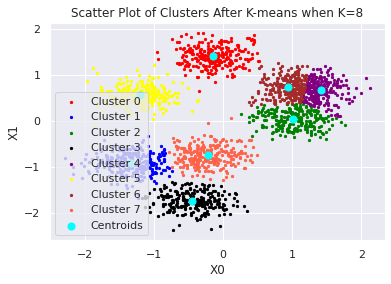

[1 3 3 ... 2 6 0]
[1.1652842833110204, 0.7778869328454259, -1.3467649280598561, -0.9112361353348255, -0.4491653195600053, -1.7365239646007464, -0.24273524799096385, -0.7474512289732864, 1.0300425003852194, 0.03458131669492126, 1.1628407983483606, 0.6200133030290856, -0.13399672803693105, 1.4069829281339168, -1.1855053583968453, 0.5557468482055081]
[1.1652842833110204, 0.7778869328454259, -1.3467649280598561, -0.9112361353348255, -0.4491653195600053, -1.7365239646007464, -0.24273524799096385, -0.7474512289732864, 1.0300425003852194, 0.03458131669492126, 1.1628407983483606, 0.6200133030290856, -0.13399672803693105, 1.4069829281339168, -1.1855053583968453, 0.5557468482055081]
[[ 1.16528428  0.77788693]
 [-1.34676493 -0.91123614]
 [-0.44916532 -1.73652396]
 [-0.24273525 -0.74745123]
 [ 1.0300425   0.03458132]
 [ 1.1628408   0.6200133 ]
 [-0.13399673  1.40698293]
 [-1.18550536  0.55574685]]


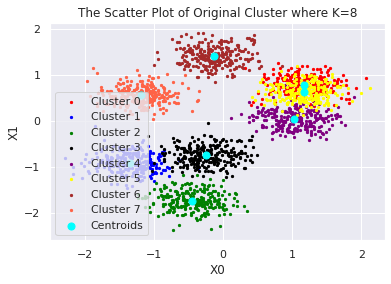

In [ ]:
# Reference source: https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/
#Fitting K-Means to the dataset
kmeans_8 = KMeans(n_clusters = 8, init = 'k-means++', random_state = 0)
#Returns a label for each data point based on the number of clusters
y = kmeans_8.fit_predict(scaled_RefData)
print(y)
# Visualising the clusters through a scatterplot
plt.scatter(scaled_RefData[y == 0, 0], scaled_RefData[y == 0, 1], s = 5, c = 'red', label = 'Cluster 0')
plt.scatter(scaled_RefData[y == 1, 0], scaled_RefData[y == 1, 1], s = 5, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_RefData[y == 2, 0], scaled_RefData[y == 2, 1], s = 5, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_RefData[y == 3, 0], scaled_RefData[y == 3, 1], s = 5, c = 'black', label = 'Cluster 3')
plt.scatter(scaled_RefData[y == 4, 0], scaled_RefData[y == 4, 1], s = 5, c = 'purple', label = 'Cluster 4')
plt.scatter(scaled_RefData[y == 5, 0], scaled_RefData[y == 5, 1], s = 5, c = 'yellow', label = 'Cluster 5')
plt.scatter(scaled_RefData[y == 6, 0], scaled_RefData[y == 6, 1], s = 5, c = 'brown', label = 'Cluster 6')
plt.scatter(scaled_RefData[y == 7, 0], scaled_RefData[y == 7, 1], s = 5, c = 'tomato', label = 'Cluster 7')
plt.scatter(kmeans_8.cluster_centers_[:, 0], kmeans_8.cluster_centers_[:, 1], s = 50, c = 'cyan', label = 'Centroids')

plt.title('Scatter Plot of Clusters After K-means when K=8')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()


#Returns a label for each data point based on the number of clusters
y1 = refData[["y"]].to_numpy().transpose()
y = y1.reshape(-1)
# for i in range(0, 2000):
print(y)
# Visualising the clusters through a scatterplot
plt.scatter(scaled_RefData[y == 0, 0], scaled_RefData[y == 0, 1], s = 5, c = 'red', label = 'Cluster 0')
plt.scatter(scaled_RefData[y == 1, 0], scaled_RefData[y == 1, 1], s = 5, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_RefData[y == 2, 0], scaled_RefData[y == 2, 1], s = 5, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_RefData[y == 3, 0], scaled_RefData[y == 3, 1], s = 5, c = 'black', label = 'Cluster 3')
plt.scatter(scaled_RefData[y == 4, 0], scaled_RefData[y == 4, 1], s = 5, c = 'purple', label = 'Cluster 4')
plt.scatter(scaled_RefData[y == 5, 0], scaled_RefData[y == 5, 1], s = 5, c = 'yellow', label = 'Cluster 5')
plt.scatter(scaled_RefData[y == 6, 0], scaled_RefData[y == 6, 1], s = 5, c = 'brown', label = 'Cluster 6')
plt.scatter(scaled_RefData[y == 7, 0], scaled_RefData[y == 7, 1], s = 5, c = 'tomato', label = 'Cluster 7')

# Find the Euclidean distance between a given point and its centroid.
# Iterate over all points, and sum the values then divide by the number of points.
centroids_k8 = []
for i in range(0, 8):
  sum0 = 0
  sum1 = 0
  count = 0
  for j in range(0, 2000):
    if y[j]==i:
      sum0 = sum0 + scaled_RefData[j][0]
      sum1 = sum1 + scaled_RefData[j][1]
      count = count + 1
  centroids_k8.append(sum0 / count)
  centroids_k8.append(sum1 / count)
# Check out the result of the coordinates of centroids for 8 clusters
print(centroids_k8)
# Verify that we do have 16 values from 8 centroids
print(centroids_k8)
# Convert the cnetroids from list type to a 2D numpy array
centroids_ak = np.array(centroids_k8)
centroids_arrayK8 = centroids_ak.reshape(8, 2)
print(centroids_arrayK8)

# Draw the centroids on scatterplot
plt.scatter(centroids_arrayK8[:, 0], centroids_arrayK8[:, 1], s = 50, c = 'cyan', label = 'Centroids')

# plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s = 50, c = 'cyan', label = 'Centroids')

plt.title('The Scatter Plot of Original Cluster where K=8')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()

In [ ]:
# Reference source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# Create a cross tabulation matrix comparing the true and assigned clusters, and the basic measures
y_pred = kmeans_8.labels_
print(y_pred)

# Since the class label that we predicted using K-means don't correspond to the orginal class labels,
# we need to make some transformation here
refData_rearranged = refData
print(refData_rearranged)
y_true = refData_rearranged[["y"]].to_numpy().transpose().reshape(-1)
for i in range(0, 2000):
  if y_true[i]==0:
    y_true[i] = 6
  elif y_true[i]==2:
    y_true[i] = 3
  elif y_true[i]==3:
    y_true[i] = 7
  elif y_true[i]==4:
    y_true[i] = 2
  elif y_true[i]==5:
    y_true[i] = 4
  elif y_true[i]==6:
    y_true[i] = 0
  elif y_true[i]==7:
    y_true[i] = 5
print(y_true)

target_names = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6', 'cluster 7']
print(classification_report(y_true, y_pred, target_names=target_names))

[1 7 7 ... 3 0 6]
      Unnamed: 0         X0        X1  y
0              0 -10.034530 -3.840980  1
1              1  -5.190377 -3.198882  3
2              2  -5.473488 -2.692955  3
3              3  -4.959855 -3.107043  3
4              4  -6.688130  8.556784  6
...          ...        ...       ... ..
1995        1995  -1.306391  1.180059  4
1996        1996  -6.506079 -9.658119  2
1997        1997  -8.333741 -6.394469  2
1998        1998  -4.121770  7.374333  6
1999        1999  -3.696761  2.463901  0

[2000 rows x 4 columns]
[1 7 7 ... 3 0 6]
              precision    recall  f1-score   support

   cluster 0       0.99      0.98      0.99       250
   cluster 1       0.95      0.99      0.97       250
   cluster 2       0.93      0.92      0.93       250
   cluster 3       1.00      0.97      0.99       250
   cluster 4       0.49      0.49      0.49       250
   cluster 5       0.99      0.99      0.99       250
   cluster 6       0.52      0.53      0.53       250
   cluster 7  

***
## Section: 1.4 - Hierarchical Clustering
- Explain all configuration parameter values you chose, and why you chose them.
- For k = 8,
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc.).
***

Running time of agglomerative algorithm is 5.255249738693237


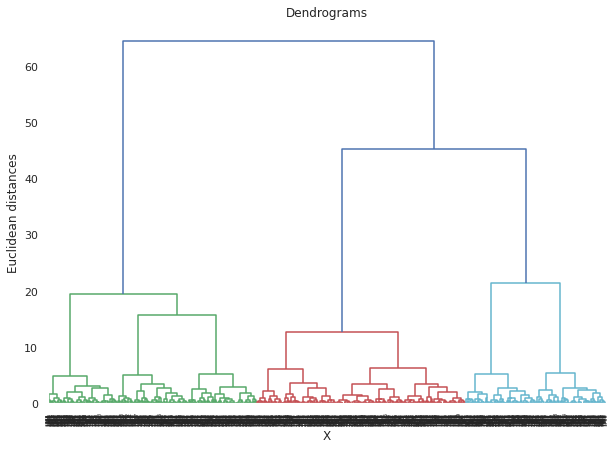

In [ ]:
# Reference source: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
# Set up the startibg time for agglomerative algorithm
start = time.time()

# Draw the dendogram to determine the number of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
plt.xlabel('X')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(scaled_RefData, method='ward'))

# plt.figure(figsize=(10, 7))
# plt.title("Dendrograms")
# dend = shc.dendrogram(shc.linkage(scaled_RefData, method='ward'))
# plt.axhline(y=30, color='r', linestyle='--')

# Set up the ending time
end = time.time()
# Print the total computing time
print(f"Running time of agglomerative algorithm is {end - start}")

[4 5 5 ... 2 1 0]
Running time of K-means algorithm is 0.10258054733276367
[1.0085192660705322, 0.07417925274145722, -0.137784393363388, 1.4052003508027315, -0.44973658474975864, -1.7464197320876347, -1.1907323482375838, 0.5513025219703649, -1.3450819248665673, -0.9047944024135206, -0.23280197261646246, -0.7650919132544782, 1.3976882352449926, 0.7020128255331073, 0.9872500707048963, 0.7466382114466897]
16
[[ 1.00851927  0.07417925]
 [-0.13778439  1.40520035]
 [-0.44973658 -1.74641973]
 [-1.19073235  0.55130252]
 [-1.34508192 -0.9047944 ]
 [-0.23280197 -0.76509191]
 [ 1.39768824  0.70201283]
 [ 0.98725007  0.74663821]]


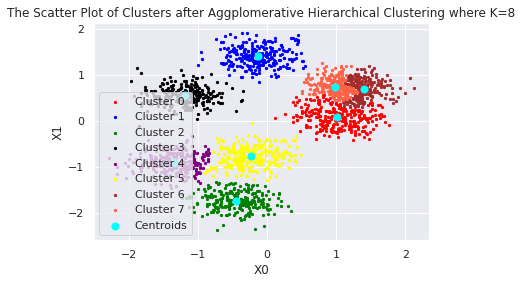

[1 3 3 ... 2 6 0]


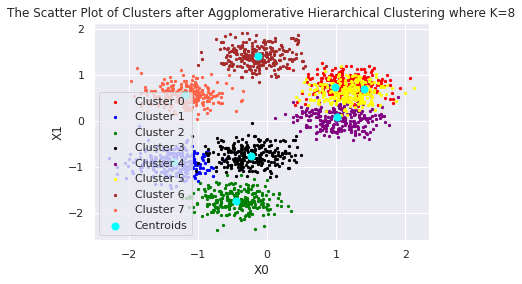

In [ ]:
# Set up the startibg time for agglomerative algorithm
start = time.time()

# Draw a scatterplot of aggplomerative hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
y = cluster.fit_predict(scaled_RefData)
print(y)
# Set up the ending time
end = time.time()
# Print the total computing time
print(f"Running time of K-means algorithm is {end - start}")

plt.scatter(scaled_RefData[y == 0, 0], scaled_RefData[y == 0, 1], s = 5, c = 'red', label = 'Cluster 0')
plt.scatter(scaled_RefData[y == 1, 0], scaled_RefData[y == 1, 1], s = 5, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_RefData[y == 2, 0], scaled_RefData[y == 2, 1], s = 5, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_RefData[y == 3, 0], scaled_RefData[y == 3, 1], s = 5, c = 'black', label = 'Cluster 3')
plt.scatter(scaled_RefData[y == 4, 0], scaled_RefData[y == 4, 1], s = 5, c = 'purple', label = 'Cluster 4')
plt.scatter(scaled_RefData[y == 5, 0], scaled_RefData[y == 5, 1], s = 5, c = 'yellow', label = 'Cluster 5')
plt.scatter(scaled_RefData[y == 6, 0], scaled_RefData[y == 6, 1], s = 5, c = 'brown', label = 'Cluster 6')
plt.scatter(scaled_RefData[y == 7, 0], scaled_RefData[y == 7, 1], s = 5, c = 'tomato', label = 'Cluster 7')

# Find the Euclidean distance between a given point and its centroid.
# Iterate over all points, and sum the values then divide by the number of points.
centroids_hierarchical = []
for i in range(0, 8):
  sum0 = 0
  sum1 = 0
  count = 0
  for j in range(0, 2000):
    if y[j]==i:
      sum0 = sum0 + scaled_RefData[j][0]
      sum1 = sum1 + scaled_RefData[j][1]
      count = count + 1
  centroids_hierarchical.append(sum0 / count)
  centroids_hierarchical.append(sum1 / count)
# Check out the result of the coordinates of centroids for 8 clusters
print(centroids_hierarchical)
# Verify that we do have 16 values from 8 centroids
print(len(centroids_hierarchical))
# Convert the cnetroids from list type to a 2D numpy array
centroids_a = np.array(centroids_hierarchical)
centroids_array = centroids_a.reshape(8, 2)
print(centroids_array)

# Draw the centroids on scatterplot
plt.scatter(centroids_array[:, 0], centroids_array[:, 1], s = 50, c = 'cyan', label = 'Centroids')
plt.title('The Scatter Plot of Clusters after Aggplomerative Hierarchical Clustering where K=8')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()


#Returns a label for each data point based on the number of clusters
y1 = refData[["y"]].to_numpy().transpose()
y = y1.reshape(-1)
# for i in range(0, 2000):
print(y)
# Visualising the clusters through a scatterplot
plt.scatter(scaled_RefData[y == 0, 0], scaled_RefData[y == 0, 1], s = 5, c = 'red', label = 'Cluster 0')
plt.scatter(scaled_RefData[y == 1, 0], scaled_RefData[y == 1, 1], s = 5, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_RefData[y == 2, 0], scaled_RefData[y == 2, 1], s = 5, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_RefData[y == 3, 0], scaled_RefData[y == 3, 1], s = 5, c = 'black', label = 'Cluster 3')
plt.scatter(scaled_RefData[y == 4, 0], scaled_RefData[y == 4, 1], s = 5, c = 'purple', label = 'Cluster 4')
plt.scatter(scaled_RefData[y == 5, 0], scaled_RefData[y == 5, 1], s = 5, c = 'yellow', label = 'Cluster 5')
plt.scatter(scaled_RefData[y == 6, 0], scaled_RefData[y == 6, 1], s = 5, c = 'brown', label = 'Cluster 6')
plt.scatter(scaled_RefData[y == 7, 0], scaled_RefData[y == 7, 1], s = 5, c = 'tomato', label = 'Cluster 7')


# Draw the centroids on scatterplot
plt.scatter(centroids_array[:, 0], centroids_array[:, 1], s = 50, c = 'cyan', label = 'Centroids')
plt.title('The Scatter Plot of Clusters after Aggplomerative Hierarchical Clustering where K=8')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()


In [ ]:
# Compute WSS, BSS, and SSE
eu_sum = 0
eu_distance = 0
for i in range(0, 6):
  # Put the coordinates of the ith centroid to a numpy array
  centroid = centroids_array[i]
  eu_distance = 0
  for j in range(0, 2000):
    if y[j]==i:
      # Put the coordinates of a point that belongs to the ith centroid to a numpy array
      point = np.array((refData.iloc[j]['X0'], refData.iloc[j]['X1']))
      # Sum up all the Euclidean distance we have computed for a cluster
      eu_distance = eu_distance + np.linalg.norm(point - centroid)
      eu_sum = eu_sum + np.linalg.norm(point - centroid)
  # Print the true within-cluster WSS
  print("{}{}: {}".format("WSS", i, eu_distance))
# Print the overall SSE
print("{}: {}".format("Overall SSE", eu_sum))


# Find the Euclidean distance from a given cluster centroid to all other cluster centroids.
# Iterate this process for all clusters, and sum all values together.
BSS = 0
for i in range(0, 6):
  centroid = centroids_array[i]
  for j in range(i+1, 6):
    other_centroid = centroids_array[j]
    BSS = BSS + np.linalg.norm(centroid - other_centroid)
# Print the value of true between-cluster WSS
print("{}: {}".format("BSS", BSS))

WSS0: 1305.6273240094304
WSS1: 2806.4988817921508
WSS2: 2286.6718747197597
WSS3: 1593.790920137916
WSS4: 528.9855458717482
WSS5: 1191.8806488224034
Overall SSE: 9713.45519535341
BSS: 28.5500454714605


In [ ]:
# Reference source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# Create a cross tabulation matrix comparing the true and assigned clusters, and the basic measures
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
y = cluster.fit_predict(scaled_RefData)
y_pred = y
print(y_pred)

# Since the class label that we predicted using K-means don't correspond to the orginal class labels,
# we need to make some transformation here
refData_rearranged = refData
print(refData_rearranged)
y_true = refData_rearranged[["y"]].to_numpy().transpose().reshape(-1)
for i in range(0, 2000):
  if y_true[i]==0:
    y_true[i] = 6
  elif y_true[i]==1:
    y_true[i] = 4
  elif y_true[i]==3:
    y_true[i] = 5
  elif y_true[i]==4:
    y_true[i] = 0
  elif y_true[i]==5:
    y_true[i] = 7
  elif y_true[i]==6:
    y_true[i] = 1
  elif y_true[i]==7:
    y_true[i] = 3
print(y_true)
target_names = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6', 'cluster 7']
print(classification_report(y_true, y_pred, target_names=target_names))

[4 5 5 ... 2 1 0]
      Unnamed: 0         X0        X1  y
0              0 -10.034530 -3.840980  1
1              1  -5.190377 -3.198882  3
2              2  -5.473488 -2.692955  3
3              3  -4.959855 -3.107043  3
4              4  -6.688130  8.556784  6
...          ...        ...       ... ..
1995        1995  -1.306391  1.180059  4
1996        1996  -6.506079 -9.658119  2
1997        1997  -8.333741 -6.394469  2
1998        1998  -4.121770  7.374333  6
1999        1999  -3.696761  2.463901  0

[2000 rows x 4 columns]
[4 5 5 ... 2 1 6]
              precision    recall  f1-score   support

   cluster 0       0.84      0.96      0.90       250
   cluster 1       0.99      1.00      0.99       250
   cluster 2       1.00      0.98      0.99       250
   cluster 3       1.00      1.00      1.00       250
   cluster 4       0.96      0.96      0.96       250
   cluster 5       0.95      0.96      0.96       250
   cluster 6       0.49      0.44      0.46       250
   cluster 7  

***
## Section: 1.5 - Compare
- Compare the results of the two algorithms. Also compare the computation time.


Reference source: https://www.geeksforgeeks.org/difference-between-k-means-and-hierarchical-clustering/

Aggplomerative clustering algorithm does not require us to prespecify the number of clusters, but K Means clustering needed advance knowledge of K.

(1) We can first look at the scatter plot after applying algorithms.They look very similar, except for the three clusters at the right up corner. Then we could look ar the cross tabulation matrix, we see the results are also very similar given the same value of K is specified. For most of the clusters, they did a very good job. We observed an overall of about 0.84 accuracy for agglomerative clustering, an overall of about 0.85 accuracy for K-means clustering. And if we look at how well predicted for each individual cluster, we see most of them are close to 0.99, except two clusters are abotu 0.5. Kmeans clustering is suitable for cycular, global shapes, which makes sense here.

(2) Kmeans are normally less computationally intensive and are suited with very large datasets. Hierarchical clustering requires the computation and storage of an n by n  distance matrix. For very large datasets, this can be expensive and slow. This conclusion is consistent with the computing time that we derived from the code above. For Kmeans clustering, the computing time is about 0.7 second; for agglomerative clustering, the computing time is about 2.1 second.

***
# Section: 2 - Non-Reference Dataset
***

***
## Section: 2.1 - Configure and Run K-Means
- Explain all configuration parameter values you chose, and why you chose them.
- Show SSE vs K (number of clusters) plot.
- Determine optimal K and compute the silhouette score.
***

            X0        X1
0    -0.787816  0.806339
1     1.480423 -0.139902
2     0.274929 -0.117472
3     0.520773 -0.367300
4     0.213426 -0.049130
...        ...       ...
1995  1.792374 -0.195105
1996  0.290452  0.336957
1997  2.387512  0.084661
1998  1.004315  0.735097
1999  0.111782  0.311004

[2000 rows x 2 columns]
[[-1.46702326  1.07103214]
 [ 1.11236161 -0.7626837 ]
 [-0.25849599 -0.71921606]
 ...
 [ 2.14388    -0.32750432]
 [ 0.57094346  0.93297194]
 [-0.44402235  0.11112421]]


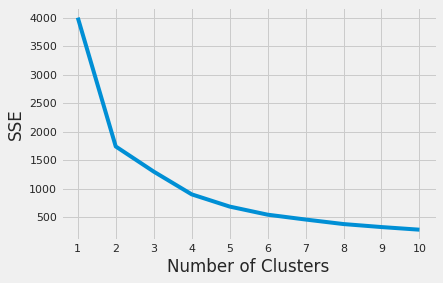

3


In [ ]:
# Reference source: https://realpython.com/k-means-clustering-python/#partitional-clustering
# First we do some data processing, rescaling the data so that X0 and X1 have the same weight
scaler = StandardScaler()
nonRefData_drop1 = nonRefData.drop(nonRefData.columns[[0]], axis = 1)
print(nonRefData_drop1)  # Drop the 1st column
scaled_nonRefData = scaler.fit_transform(nonRefData_drop1)
print(scaled_nonRefData)  # We can see the values are different from original data, so now we can do K-means clustering

# Perform the k-plot method, run several k-means, increment k with each iteration, and record the SSE
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}  # For "init" param, we choose "random" because
# we want to do the standard way first. For "mn_init", we choose 10 because we want to have many initializations so we can choose the one
# with the lowest SSE meanwhile considering the practical running time. For "max_iter" we choose 300 because we want to give each initialization more space for multiple runs.

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_nonRefData)
   sse.append(kmeans.inertia_)

# Plot SEE and the number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
# Identify the elbow point
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)



As we can see from the above graph, the elbow point os located at x=3


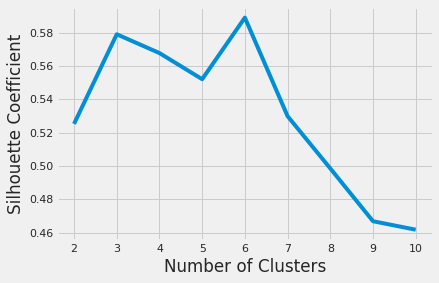

In [ ]:
# Compute the Silhouette score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_RefData)
  score = silhouette_score(scaled_RefData, kmeans.labels_)
  silhouette_coefficients.append(score)

# Plot the average silhouette scores for each k and find the max
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()




As we can see from the above graph, the maximum appears at 6, so our best choice for k is k=6.

[0 1 0 ... 1 1 0]


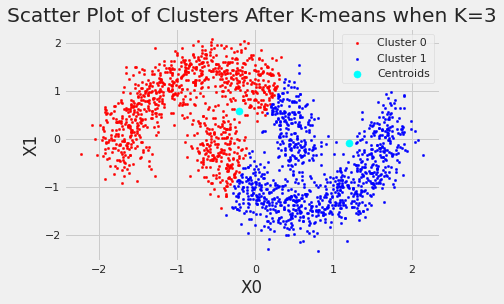

In [ ]:
# Reference source: https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/
# Let's use our estimated optimal K value to initilize the K-means method
kmeans_optimalK = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)

y = kmeans_optimalK.fit_predict(nonRefData_drop1)
print(y)

# Visualising the clusters through a scatterplot
plt.scatter(scaled_nonRefData[y == 0, 0], scaled_nonRefData[y == 0, 1], s = 5, c = 'red', label = 'Cluster 0')
plt.scatter(scaled_nonRefData[y == 1, 0], scaled_nonRefData[y == 1, 1], s = 5, c = 'blue', label = 'Cluster 1')

plt.scatter(kmeans_optimalK.cluster_centers_[:, 0], kmeans_optimalK.cluster_centers_[:, 1], s = 50, c = 'cyan', label = 'Centroids')

plt.title('Scatter Plot of Clusters After K-means when K=3')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()


***
## Section: 2.2 - Configure and Run the Hierarchical Clustering
- Explain all configuration parameter values you chose, and why you chose them.
- Use number of clusters determined from previous section to compute silhouette score.
***

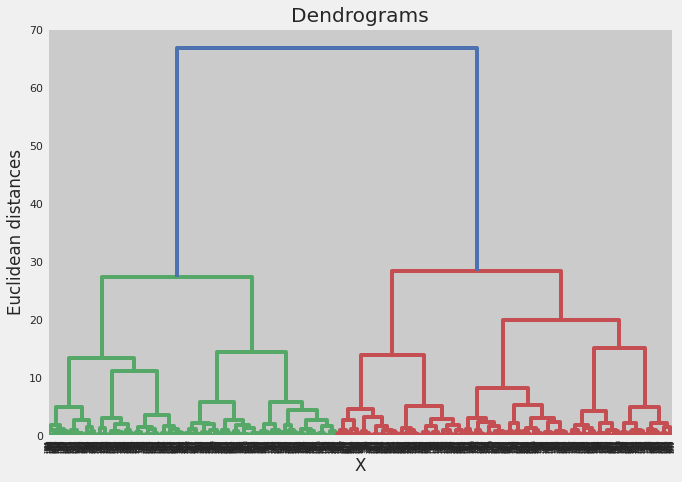

In [ ]:
# Draw the dendogram to determine the number of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
plt.xlabel('X')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(scaled_nonRefData, method='ward'))

[0 1 1 ... 1 0 0]
Running time of K-means algorithm is 0.10005760192871094
Silhouette Coefficient: 0.477


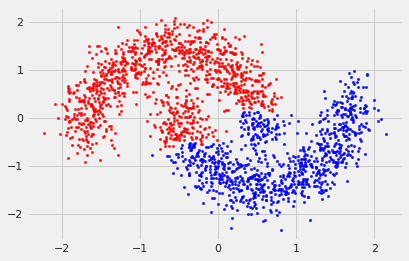

In [ ]:
# Set up the startibg time for agglomerative algorithm
start = time.time()

# Draw a scatterplot of aggplomerative hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y = cluster.fit_predict(scaled_nonRefData)
print(y)
labels = y
# Set up the ending time
end = time.time()
# Print the total computing time
print(f"Running time of K-means algorithm is {end - start}")

plt.scatter(scaled_nonRefData[y == 0, 0], scaled_nonRefData[y == 0, 1], s = 5, c = 'red', label = 'Cluster 0')
plt.scatter(scaled_nonRefData[y == 1, 0], scaled_nonRefData[y == 1, 1], s = 5, c = 'blue', label = 'Cluster 1')

# Compute the Silhuette score
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scaled_nonRefData, cluster.labels_))

***
## Section: 2.3 - Configure and Run the DBSCAN Clustering
- Explain all configuration parameter values you chose, and why you chose them.
- Use number of clusters determined from previous section to compute silhouette score.
***

[ 0  1  1  1  1  1 -1  0 -1  0  1  1  1  1  0  1  0  1  0  1  0  1  1  0
  0  0  1  0  0  0  1  0  1 -1  0  0  0  0  0  1  0  0  1  1  1  1  0  1
  1  1 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  0  1  0  0  1  1  1
  1  1  1  0  1  1  1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  1  1  0
 -1  0  0  0]
Estimated no. of clusters: 6
Estimated no. of noise points: 150
Running time of DBSCAN algorithm is 0.01410531997680664


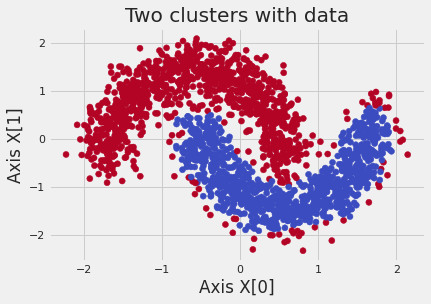

[ True  True  True ... False False  True]
5
Silhouette Coefficient: -0.058


In [ ]:
# Reference source: https://shritam.medium.com/how-dbscan-algorithm-works-2b5bef80fb3
# Reference source: https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/#code-example-how-to-perform-dbscan-clustering-with-scikit-learn
# Set up the startibg time for this K-means algorithm
start = time.time()

# Initialize the DBSCAN model
db = DBSCAN(eps = 0.113, min_samples = 6).fit(scaled_nonRefData)  # We choose "min_samples = 6" becase
# that's the estimated value of K
labels = db.labels_
print(db.labels_[:100])

# pca = PCA(n_components=2).fit(scaled_nonRefData)
# pca_2d = pca.transform(scaled_nonRefData)
# for i in range(0, pca_2d.shape[0]):
#   if db.labels_[i] == 0:
#     c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
#   elif db.labels_[i] == 1:
#     c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
#   elif db.labels_[i] == -1:
#     c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
#   plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
#   plt.title('DBSCAN finds 2 clusters and noise')
#   plt.show()

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Set up the ending time
end = time.time()
# Print the total computing time
print(f"Running time of DBSCAN algorithm is {end - start}")

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(scaled_nonRefData[:,0], scaled_nonRefData[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

# measure the performance of dbscan algo
# Identifying which points make up our “core points”
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[db.core_sample_indices_] = True
print(core_samples)
#Calculating "the number of clusters"
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
#Computing "the Silhouette Score"
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(scaled_nonRefData, labels))

***
## Section: 2.4 - Compare
- Compare the results from all 3 algorithm. Also compare the computation time.
***

I have already discussed the difference between Kmeans and Heirarchical clustering algorithms, so here I will focus on the comparison these two algorithms and DBSCAN.
(1) If we look at the scatter plot after we applied these three algorithms, we could find they performed differently. For Kmeans algorithm, it tends to find clusters in a shpae of circle. But our data is actually two curve interwined together. It turns out that Kmeans couldn't determine these two clusters clearly, it still gives us clusters in the basis of two circle that has their centroids as the center. For hierarchical algorithm, we seem to see a little bit of improvements compared to Kmeans, but still, there is a small part of both clustures that couldn't be classified correctly. Then for DBSCAN, we finally see a descent clustering result since this algorithm successfully finds the patterns that interwined together.
(2) If we look at the Silhouette score, we will see consistent findings with our plot.

***
# Section: 3 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

I find a lot of interesting things after doing this homework. First, I think the work of different clustering algorithms is pretty subjective. Everyone could have their own results for the predicted labels even from the same dataset. There may be multiple optimal solutions depending on how you set up your clustering algorithms. However, it's still suggested to choose the most suitable clustering algorithm depending on your dataset. As I did in all previous steps, we could see some algorithms performs good and some don't.

***
### END-OF-SUBMISSION
***